### Analyse der Sonnenfleckenaktivität durch Zeit-Frequenz-Analyse

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from pandas.plotting import autocorrelation_plot
from pandas import Series
import scipy.signal as sp
from scipy.signal import chirp
import numpy as np
#from spectrum import *
%matplotlib inline
from stockwell import st

Die Aktivität der Sonnenflecken besitzt Einflüsse auf das Erdmagnetfeld, das Weltraumwetter, welches für den Betrieb von Satelliten wichtig ist und auch für den Betrieb elektrischer Einrichtungen und von Telekommunikationsanlagen auf der Erde.
In früheren Zeiten konnte auch ein Einfluss auf das Erdklima beobachtet werden, in der jüngeren Vergangenheit dominiert hier jedoch der vom Menschen verursachte Klimawandel. 

Die Anzahl der Sonnenflecken pro Jahr wird seit 1749 gezählt und steht inzwischen auch zum Download bereit:
https://www.sidc.be/SILSO/datafiles

In [58]:
# testdata = pd.read_csv("SN_y_tot_V2.0.csv",delimiter ="; ", engine = 'python') # Jährliche Zählung
testdata = pd.read_csv("SN_y_tot_V2.0.csv",delimiter ="; ", engine = 'python') # Jährliche Zählung
testdata.head()

,Year,Sunspots,C3,C4,C5
0,1700.5,8.3,-1.0;-1;1,NaN,NaN
1,1701.5,18.3,-1.0;-1;1,NaN,NaN
2,1702.5,26.7,-1.0;-1;1,NaN,NaN
3,1703.5,38.3,-1.0;-1;1,NaN,NaN
4,1704.5,60.0,-1.0;-1;1,NaN,NaN


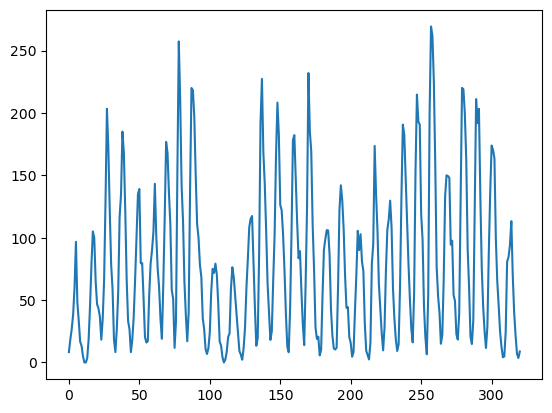

In [59]:
#testdata.plot(y='Sunspots')
plt.figure()
plt.plot(testdata.Sunspots)

Parametrierung der Stockwell Transformation: Zeit- und Frequenzachse

Für die Analyse der Dynamik ist der Mittelwert der Zeitreihe hinderlich und wird entfernt:

In [104]:
testdata['Sunspots_AC'] = testdata.Sunspots - testdata.Sunspots.mean()

In [150]:
timeseries = testdata.Sunspots_AC
fmin = 0 # 1/ Jahre
fmax = 0.5 # 1/ Jahre (Periode ca. 10 Jahre)
t = testdata.Year
df = 1./(t[len(t)-1]-t[0]) # Frequenzauflösung =  1/(Zeitumfang der Zeitreihe)
fmin_samples = int(fmin/df)
fmax_samples = int(fmax/df)

In [151]:
# t = np.linspace(0, 10, 5001)
# w = chirp(t, f0=12.5, f1=2.5, t1=10, method='linear')
# fmin = 0  # Hz
# fmax = 25  # Hz
# fs = 1./(t[1] - t[0])
# df = 1./(t[-1]-t[0])  # sampling step in frequency domain (Hz)
# fmin_samples = int(fmin/df)
# fmax_samples = int(fmax/df)
# timeseries = w

Ausführen der Transformation

In [152]:
stock = st.st(timeseries, fmin_samples, fmax_samples)

Plot 

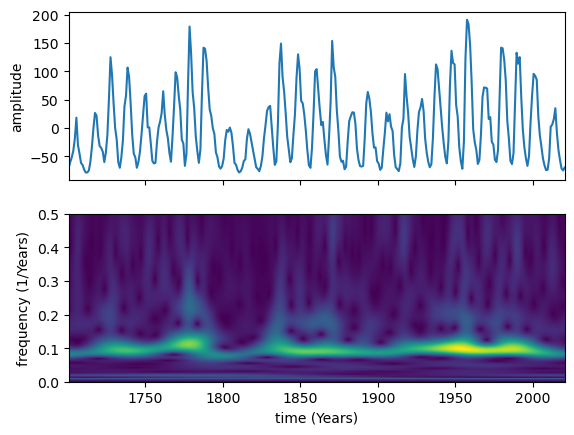

In [153]:
extent = (t[0], t[len(t)-1], fmin, fmax)

fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].plot(t, timeseries)
ax[0].set(ylabel='amplitude')
ax[1].imshow(np.abs(stock), origin='lower', extent=extent)
ax[1].axis('tight')
ax[1].set(xlabel='time (Years)', ylabel='frequency (1/Years)')
plt.show()

In [181]:
ff, tt, spectrogram = sp.spectrogram(timeseries, fs = fs)

In [182]:
ff

array([  0.      ,   1.953125,   3.90625 ,   5.859375,   7.8125  ,
         9.765625,  11.71875 ,  13.671875,  15.625   ,  17.578125,
        19.53125 ,  21.484375,  23.4375  ,  25.390625,  27.34375 ,
        29.296875,  31.25    ,  33.203125,  35.15625 ,  37.109375,
        39.0625  ,  41.015625,  42.96875 ,  44.921875,  46.875   ,
        48.828125,  50.78125 ,  52.734375,  54.6875  ,  56.640625,
        58.59375 ,  60.546875,  62.5     ,  64.453125,  66.40625 ,
        68.359375,  70.3125  ,  72.265625,  74.21875 ,  76.171875,
        78.125   ,  80.078125,  82.03125 ,  83.984375,  85.9375  ,
        87.890625,  89.84375 ,  91.796875,  93.75    ,  95.703125,
        97.65625 ,  99.609375, 101.5625  , 103.515625, 105.46875 ,
       107.421875, 109.375   , 111.328125, 113.28125 , 115.234375,
       117.1875  , 119.140625, 121.09375 , 123.046875, 125.      ,
       126.953125, 128.90625 , 130.859375, 132.8125  , 134.765625,
       136.71875 , 138.671875, 140.625   , 142.578125, 144.531

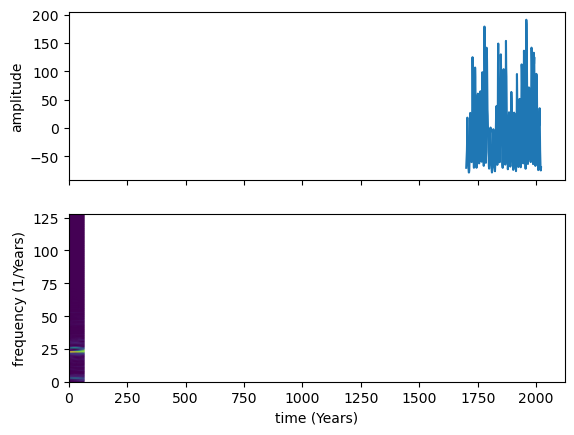

In [178]:
fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].plot(t, timeseries)
ax[0].set(ylabel='amplitude')
#ax[1].imshow(np.abs(spectrogram), origin='lower', extent=extent)
ax[1].pcolormesh(np.abs(spectrogram) , shading='gouraud')
ax[1].set(xlabel='time (Years)', ylabel='frequency (1/Years)')
#ax[1].set_ylim([fmin, fmax])
#ax[1].set_xlim([t[0], t[len(t)-1]])
ax[1].axis('tight')
plt.show()

In [156]:
testdata.head()

,Year,Sunspots,C3,C4,C5,Sunspots_AC
0,1700.5,8.3,-1.0;-1;1,NaN,NaN,-70.217134
1,1701.5,18.3,-1.0;-1;1,NaN,NaN,-60.217134
2,1702.5,26.7,-1.0;-1;1,NaN,NaN,-51.817134
3,1703.5,38.3,-1.0;-1;1,NaN,NaN,-40.217134
4,1704.5,60.0,-1.0;-1;1,NaN,NaN,-18.517134


<Axes: xlabel='Year'>

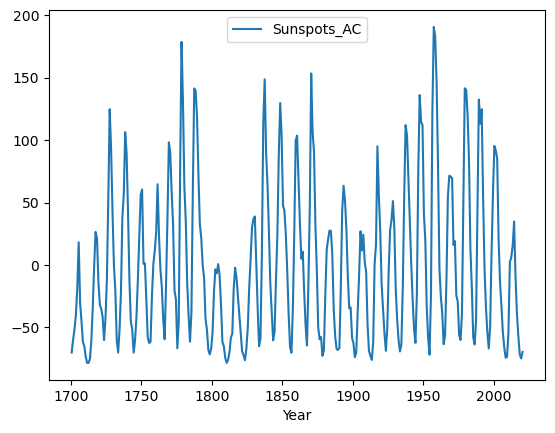

In [114]:
testdata.plot(x='Year',y='Sunspots_AC')

Ein autoregressives Modell nach Yule-Walker kann mit vorhandenen Funktionen, bspw aus dem Paket spectrum berechnet werden.

In [1]:
#AR, P, k = aryule(testdata.Sunspots_AC, 2)

Alternativ kann 

$u(k) = b_1 u(k-1) + b_2 u(k-2) + v(k) $

In [8]:
# Aufbau der Regressionsmatrix und des Vektors für die rechte Seite
phi = np.zeros((len(testdata.Sunspots_AC),2))
u = np.zeros((len(testdata.Sunspots_AC),1))
 
for i in range(2,len(testdata.Sunspots_AC)): # Auftellen des Gleichungssystemes: p[0]= a,p[1]= b
    phi[i,0] = testdata.Sunspots_AC[i-1]
    phi[i,1] = testdata.Sunspots_AC[i-2]
    u[i,0] = testdata.Sunspots_AC[i]
  
AR, residuals, rank, s = np.linalg.lstsq(phi,u,-1)

AR = -AR

Transformation in den Frequenzbereich: Berechnung des Leistungsdichtespektrums. Es ergibt sich eine Darstellung mit einer Frequenz in der Einheit [1/Jahre] Entsprechend kann die Periodizität im Diagramm einfach abgelesen werden

<IPython.core.display.Javascript object>


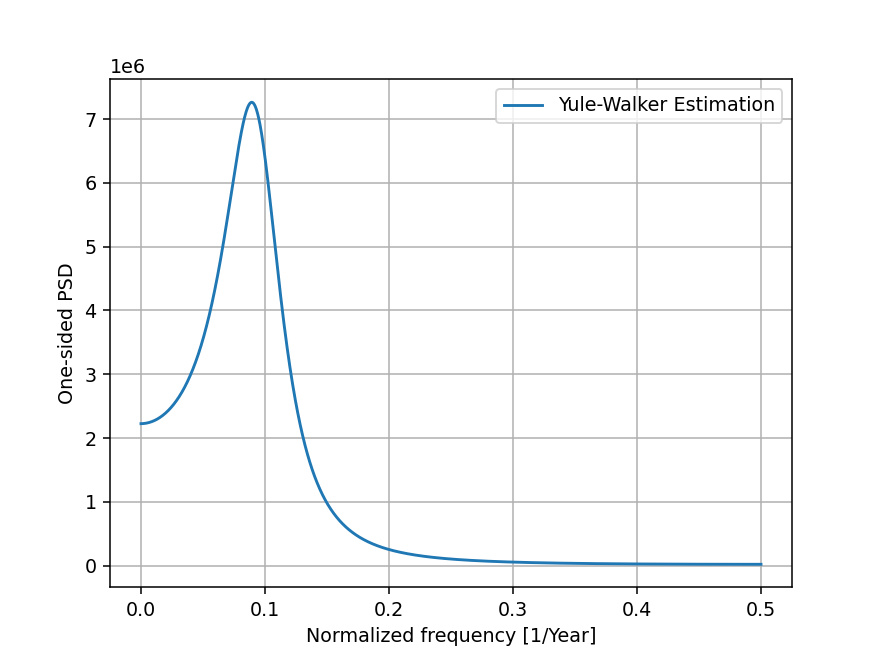

In [9]:
PSD = arma2psd(A=AR, rho=residuals)
PSD = PSD[4096:2048:-1]
plt.figure()
plt.plot(linspace(0, 0.5 , len(PSD)), PSD, label='Yule-Walker Estimation')
plt.xlabel('Normalized frequency [1/Year]')
plt.ylabel('One-sided PSD')
plt.legend()
plt.savefig('YWestimation.svg')
plt.grid()

Die Periodendauer kann aber auch direkt aus den Parametern bestimmt werden. Hierzu wird die Nullstelle des charakteristischen Polynoms berechnet.

In [10]:
AR

array([[-1.38530008],
       [ 0.69292643]])

In [11]:
ARpoly = np.append(1, AR)
print(ARpoly)

[ 1.         -1.38530008  0.69292643]


In [12]:
p = np.roots(ARpoly)
print(p)

[0.69265004+0.46169509j 0.69265004-0.46169509j]


In [13]:
f = 1/(2*np.pi) * np.arctan(np.imag(p[0])/np.real(p[0]))

In [14]:
print(1/f)

10.686942783324046
